## 外送平台(1)-foodpanda 

In [4]:
import requests as rq
from pyquery import PyQuery as pq
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# 輸入外送地址
address = input("輸入外送地址(OO市OO區OO路OO號):")

# selenium 開啟瀏覽器
driver = webdriver.Chrome('chromedriver.exe')
driver.get("https://www.foodpanda.com.tw/")
# driver.maximize_window()

#找到輸入框
element = driver.find_element_by_xpath("//*[@id='delivery-information-postal-index']")

#輸入內容
element.send_keys(address)

time.sleep(1)

#提交表單
python_button = driver.find_elements_by_xpath("//*[@id='delivery-information-postal-index-form']/div[2]/button[1]")[0]
python_button.click()

time.sleep(8)

#分頁
# python_button = driver.find_element_by_xpath("//*[@id='filters-react-root']/aside/div[1]")
# python_button.click()

# element = driver.find_element_by_xpath("//*[@id='filters-react-root']/aside/div[1]/div/input")
# element.send_keys(restaurant)
# element.send_keys(Keys.ENTER)

# time.sleep(1)

#抓取本頁URL並關閉瀏覽器
html = driver.find_element_by_css_selector("*").get_attribute("outerHTML")
doc = pq(html)

time.sleep(1)

# 地址例外處理
if (doc("section.vendor-list-section.opened > ul > li").text()==""):
    print("----------------------------------------------------------------------------------------------")
    print("Oops! Something Wrong!\nTry to Key in the 'detail'(完整的) address!")
driver.close()

輸入外送地址(OO市OO區OO路OO號):台北市大安區辛亥路三段188號
----------------------------------------------------------------------------------------------
Oops! Something Wrong!
Try to Key in the 'detail'(完整的) address!


In [ ]:
# 找目前有開放訂購的餐廳
foodList = []
foodCategory = []
foodDict_By_Category = {}
foodDict_By_Stars = {}
foodDict_By_Fee = {}
foodDict_By_Attr = {}


# 處理資料(EX:Name,Rate,Fee...)
for eachStore in doc("section.vendor-list-section.opened > ul > li").items():  
    # {Name} = foodCategory
    foodDict = {}
    foodCategory.append(eachStore("li.vendor-characteristic span").text())
    foodDict[eachStore("span.name").text()] = eachStore("li.vendor-characteristic span").text()
    foodDict_By_Category.update(foodDict)
    # [Name] -> foodList
    foodList.append(eachStore("span.name").text())
    # {Name} = Rate
    foodDict = {}
    foodDict[eachStore("span.name").text()] = eachStore("span.rating strong").text()
    foodDict_By_Stars.update(foodDict)
    # {Name} = Fee
    foodDict = {}
    foodDict[eachStore("span.name").text()] = eachStore("ul.extra-info span").text().split(" ")[0].split("$")[-1]+"$ 運費"
    foodDict_By_Fee.update(foodDict)
    # {Name} = attr
    foodAttr = {}
    foodAttr[eachStore("span.name").text()] = eachStore("a").attr("href")
    foodDict_By_Attr.update(foodAttr)  
    
# 由值找鍵的函式   
def get_key (dict, value):
    return [k for k, v in dict.items() if v == value]

# 沒有星星 -> 0
NoStars = []
NoStars.append(get_key(foodDict_By_Stars,""))
if NoStars[0] != []:
    for i in range(len(NoStars[0])):
        foodDict_By_Stars[NoStars[0][i]] = "0"  

# 星星字串 -> 星星數量(float)
for i in range(len(foodDict_By_Stars)+1):
    foodDict_By_Stars[foodList[i]] = float(foodDict_By_Stars[foodList[i]])

In [5]:
# 輸入想吃的種類
print("=="*20+" 以下是目前有開放訂購的餐廳 "+"=="*20)
print()

category = input("輸入想吃的食物種類(EX:美式、日式、義式...): ")
print()
print("\033[1;31m =================== 目前開放訂購的餐廳中種類包含「"+category+"」的店家(依星星數量由多至少排序) =====================  \033[0m \n")

webURL = "https://www.foodpanda.com.tw"
results = []
Results_By_Stars ={}
category_name = []
for i in range(len(foodCategory)):
    if category in foodCategory[i]:
        # {Results_Name} = Results_rate
        category_name = get_key(foodDict_By_Category,foodCategory[i])
        if len(category_name)==1:
            Results_By_Stars[str(category_name[0])] = foodDict_By_Stars[category_name[0]]
        else:
            for j in range(len(category_name)):
                Results_By_Stars[category_name[j]] = foodDict_By_Stars[category_name[j]]
    else:
        results.append(-1)
# 例外抓取
if len(results) == len(foodCategory):
    print("可惜! 沒有包含此種類的店家!")        

# 想吃的種類中依照星星數量排序
# [Name,rate]
Results_Sorted_By_Stars = sorted(Results_By_Stars.items(),key = lambda x:x[1],reverse = True)
        
for i in range(len(Results_Sorted_By_Stars)):
    if Results_Sorted_By_Stars[i][1] == 0:
        output = "{}. \033[7;30m {} \033[0m \033[7;32m {} \033[0m  \033[7;33m {}顆星(No Comment) \033[0m ".format(i+1,Results_Sorted_By_Stars[i][0],foodDict_By_Category[Results_Sorted_By_Stars[i][0]],Results_Sorted_By_Stars[i][1])
    else:
        output = "{}. \033[7;30m {} \033[0m \033[7;32m {} \033[0m  \033[7;33m {}顆星 \033[0m ".format(i+1,Results_Sorted_By_Stars[i][0],foodDict_By_Category[Results_Sorted_By_Stars[i][0]],Results_Sorted_By_Stars[i][1])
    print(output+"\n")
    print(webURL+foodDict_By_Attr[Results_Sorted_By_Stars[i][0]])
    print("-"*90)

======================================== 以下是目前有開放訂購的餐廳 ========================================

輸入想吃的食物種類(EX:美式、日式、義式...): 美式

 =================== 目前開放訂購的餐廳中種類包含「美式」的店家(依星星數量由多至少排序) =====================   

1.  Pizza Hut必勝客 (和東外送店)   Pizza 比薩 非店內價 美式料理    4.7顆星  

https://www.foodpanda.com.tw/restaurant/y0ij/pizza-hutbi-sheng-ke-he-dong-wai-song-dian
------------------------------------------------------------------------------------------
2.  SUBWAY (安居店)   店內價 素食 美式料理    4.7顆星  

https://www.foodpanda.com.tw/restaurant/y5hc/subway-an-ju-dian
------------------------------------------------------------------------------------------
3.  淘客美式漢堡 (台北公館店)   店內價 飲料 美式料理    4.7顆星  

https://www.foodpanda.com.tw/restaurant/w4nb/tao-ke-mei-shi-han-bao-tai-bei-gong-guan-dian
------------------------------------------------------------------------------------------
4.  人从众厚切牛排館 (台北安居店)   店內價 中港 美式料理    4.6顆星  

https://www.foodpanda.com.tw/restaurant/w1vm/ren-cong-zhong-hou-qie-niu-pai-guan-t

In [37]:
# 輸入外送餐廳名稱
restaurant = input("輸入想外送的餐廳名稱:")
print()

# 排列最接近的Name
print("\033[1;31m =============== 目前開放訂購的餐廳中最接近「"+restaurant+"」的店家(依星星數量由多至少排序) ==================  \033[0m \n")

foodCloserList = []
for i in range(len(foodList)):
    if restaurant in foodList[i]:
        foodCloserList.append(foodList[i])
        
# 最接近Name的餐廳的星星數量排列
foodCloserDict_By_stars = {}
for i in range(len(foodCloserList)):
    foodCloserDict_By_stars[foodCloserList[i]] = foodDict_By_Stars[foodCloserList[i]]
foodCloserList_By_stars = sorted(foodCloserDict_By_stars.items(),key = lambda x:x[1],reverse = True)

if foodCloserList == []:
    print("可惜! "+restaurant+"目前沒有提供foodpanda外送服務!")
#     print("----------------------------------------------------------------------")
#     # 找出最接近的前n個Name
#     num = input("輸入前N個最接近"+restaurant+"的結果:")
#     print()
#     for i in range(int(num)):
#         foodCloserList.append(foodList[i]) 
#         output = "{:<1d}.\t{:<20s}\t{:>10s}".format(i+1,foodCloserList[i],foodDict_By_Stars[foodList[i]])
#         print(output)

else:
    for i in range(len(foodCloserList)):
        if len(foodCloserList) == 1:
            output = "\033[7;30m {} \033[0m \033[7;33m {}顆星 \033[0m\n\n {} ".format(foodCloserList_By_stars[i][0],foodCloserList_By_stars[i][1],webURL+foodDict_By_Attr[foodCloserList_By_stars[i][0]])
            print(output)
        else:
            output = "{}. \033[7;30m {} \033[0m \033[7;33m {}顆星 \033[0m".format(i+1,foodCloserList_By_stars[i][0],foodCloserList_By_stars[i][1])
            print(output)
            print()
            print(webURL+foodDict_By_Attr[foodCloserList_By_stars[i][0]])
            print("-"*90)

輸入想外送的餐廳名稱:師園

 =============== 目前開放訂購的餐廳中最接近「師園」的店家(依星星數量由多至少排序) ==================   

可惜! 師園目前沒有提供foodpanda外送服務!


In [38]:
# 依照星星數量排列(多到少)
print("\033[1;31m ================================= 外送地址附近目前有開放訂購的餐廳(依星星數量由多至少排序) ============================== \033[0m \n")
foodDict_Sorted_By_Stars = sorted(foodDict_By_Stars.items(),key = lambda x:x[1],reverse = True)
# foodDict_Sorted_By_Stars = sorted

# 輸出排序後的店家
for i in range(len(foodDict_Sorted_By_Stars)):
    if foodDict_Sorted_By_Stars[i][1] == 0:
        output = "{:<d}. \033[7;30m {} \033[0m  \033[7;33m {}顆星(No Comment) \033[0m".format(i+1,foodDict_Sorted_By_Stars[i][0],foodDict_Sorted_By_Stars[i][1])
    else:
        output = "{:<d}. \033[7;30m {} \033[0m  \033[7;33m {}顆星 \033[0m".format(i+1,foodDict_Sorted_By_Stars[i][0],foodDict_Sorted_By_Stars[i][1])
    print(output)
    print()
    print(webURL+foodDict_By_Attr[foodDict_Sorted_By_Stars[i][0]])
    print("-"*100)

 ================================= 外送地址附近目前有開放訂購的餐廳(依星星數量由多至少排序) ==============================  

1.  Ombré    5.0顆星 

https://www.foodpanda.com.tw/restaurant/b7wi/ombre
----------------------------------------------------------------------------------------------------
2.  西西里克餐館店    5.0顆星 

https://www.foodpanda.com.tw/restaurant/y0ju/xi-xi-li-ke-can-guan-dian
----------------------------------------------------------------------------------------------------
3.  執串燒本店    4.8顆星 

https://www.foodpanda.com.tw/restaurant/b6lo/zhi-chuan-shao-ben-dian
----------------------------------------------------------------------------------------------------
4.  熊饌美廚    4.8顆星 

https://www.foodpanda.com.tw/restaurant/z7er/xiong-zhuan-mei-chu
----------------------------------------------------------------------------------------------------
5.  鮮茶道 (科技大樓店)    4.8顆星 

https://www.foodpanda.com.tw/restaurant/z6lz/xian-cha-dao-ke-ji-da-lou-dian
-----------------------------------------------------

In [39]:
# 依照運費排列(少到多)
print("\033[1;31m ================================== 外送地址附近目前有開放訂購的餐廳(依照運費由少至多排序) ================================== \033[0m \n")
foodDict_Sorted_By_Fee = sorted(foodDict_By_Fee.items(),key = lambda x:x[1],reverse = False)

# 輸出排序後的店家
for i in range(len(foodDict_Sorted_By_Stars)):
    output = "{:<d}. \033[7;30m {} \033[0m   \033[7;34m {} \033[0m".format(i+1,foodDict_Sorted_By_Fee[i][0],foodDict_Sorted_By_Fee[i][1])
    print(output)
    print()
    print(webURL+foodDict_By_Attr[foodDict_Sorted_By_Stars[i][0]])
    print("-------------------------------------")

 ================================== 外送地址附近目前有開放訂購的餐廳(依照運費由少至多排序) ==================================  

1.  ZAC ZAG 一楽炸雞     30$ 運費 

https://www.foodpanda.com.tw/restaurant/b7wi/ombre
-------------------------------------
2.  艋舺雞排 (大安通化店)     30$ 運費 

https://www.foodpanda.com.tw/restaurant/y0ju/xi-xi-li-ke-can-guan-dian
-------------------------------------
3.  通化街米粉湯50年老店(胡記復興旗艦店)     30$ 運費 

https://www.foodpanda.com.tw/restaurant/b6lo/zhi-chuan-shao-ben-dian
-------------------------------------
4.  燈籠滷味創始總店     30$ 運費 

https://www.foodpanda.com.tw/restaurant/z7er/xiong-zhuan-mei-chu
-------------------------------------
5.  砂鍋煲麵     30$ 運費 

https://www.foodpanda.com.tw/restaurant/z6lz/xian-cha-dao-ke-ji-da-lou-dian
-------------------------------------
6.  麵工坊 MGF Pasta (台北大安店)     30$ 運費 

https://www.foodpanda.com.tw/restaurant/b7oq/chun-fang-hao-tai-bei-xin-yi-dian
-------------------------------------
7.  紫牛牛排     30$ 運費 

https://www.foodpanda.com.tw/restaurant/z5eo/85du-c

In [186]:
# 選定某家餐廳 
import pandas as pd

chooseRest = input("輸入確定訂購的餐廳名稱: ")
print()
if chooseRest not in foodList:
    print(" \033[1;31m OOPs! 找不到「"+chooseRest+"」，請輸入餐廳完整名稱! \033[0m")
else:
    print("\033[1;31m ================================== 列出訂購的餐廳資訊 ================================== \033[0m \n")

    # 列出該家資訊(名稱、評價、超連結、運費、菜單、價格)
    StoreName = chooseRest
    StoreRate = foodDict_By_Stars[StoreName]
    StoreFee = foodDict_By_Fee[StoreName]
    StoreAttr = foodDict_By_Attr[StoreName]
    StoreCategory = foodDict_By_Category[StoreName]
    print("餐廳名稱: \033[7;30m {} \033[0m\n".format(StoreName))
    print("類型: \033[7;32m {} \033[0m\n".format(StoreCategory))
    print("評價: \033[7;33m {}顆星 \033[0m\n".format(StoreRate))
    print("運費: \033[7;34m {} \033[0m\n".format(StoreFee))
    print("超連結: {}\n".format(webURL+StoreAttr))

    # 進入該店家的網頁
    RestResponse = rq.get(webURL+StoreAttr)
    RestDoc = pq(RestResponse.text)

    # 爬取菜單，價格
    print("=="*25+" 菜單 "+"=="*25)
    print()

    orderList = []
    nameList = []
    descripList = []
    priceList = []
    orderDict = {}
    
# 處理資料
    for each in RestDoc("div.menu__list > section > div.menu__items > ul > li").items():
        
        orderDict[each(".dish-info > h3 > span").text()] = [each(".dish-info p").text(),each("section > span").text()]
        orderList.append(orderDict)
        
        nameList.append(each(".dish-info > h3 > span").text())
        descripList.append(each(".dish-info p").text())
        priceList.append(each("section > span").text())
        
    if "提供" in nameList[0] :
        del nameList[0]
        del descripList[0]
        del priceList[0]

    # 輸出資料
    EatList = []
    for i in range(len(nameList)):
        if descripList[i] == "":
            descripList[i] = "無"
        print("商品名稱: \033[7;30m {} \033[0m\n".format(nameList[i]))
        print("商品描述: {}\n".format(descripList[i]))
        print("價格: \033[7;33m {} \033[0m\n".format(priceList[i]))
        print("-"*100)
        print()
        
        EatList.append([nameList[i],float(priceList[i].split('從NT$')[-1])])
        pd.DataFrame(nameList,priceList)

輸入確定訂購的餐廳名稱: 通化街米粉湯50年老店(胡記復興旗艦店)

 ================================== 列出訂購的餐廳資訊 ==================================  

餐廳名稱:  通化街米粉湯50年老店(胡記復興旗艦店) 

類型:  便當 非店內價 中港 

評價:  4.5顆星 

運費:  30$ 運費 

超連結: https://www.foodpanda.com.tw/restaurant/y3pm/tong-hua-jie-mi-fen-tang-50nian-lao-dian-hu-ji-fu-xing-qi-jian-dian

================================================== 菜單 ==================================================

商品名稱:  魯肉飯 

商品描述: 可以吃三碗，餐點固定化製作備註不一定剛好會如盡所願，只能盡量

價格:  從 NT$40.00 

----------------------------------------------------------------------------------------------------



ValueError: could not convert string to float: '從 NT$40.00'

菜單中最貴的價格:從 NT$72.00


,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,魯肉飯,雞肉飯,雞魯飯,米粉湯,芋頭米粉湯,海鮮米粉湯,海鮮麵,擔仔麵,客家粄條,擔仔米粉,...,丸仔湯,赤肉湯,肝連湯,豬心湯,豬肝湯,枸杞麻油蝦,麻油豬心湯,麻油豬肝湯,麻油赤肉湯,罐裝無糖茶
1,從 NT$40.00,從 NT$50.00,從 NT$60.00,從 NT$40.00,NT$65.00,NT$95.00,NT$95.00,NT$50.00,NT$50.00,NT$50.00,...,NT$48.00,NT$65.00,NT$69.00,NT$65.00,NT$55.00,NT$110.00,NT$110.00,NT$100.00,NT$110.00,NT$35.00


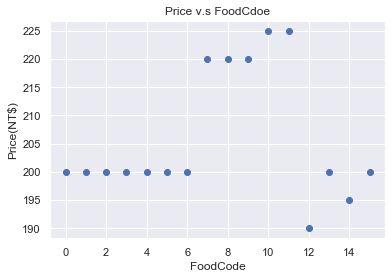

In [184]:
import matplotlib as mlp
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sbs; sbs.set()
import pandas as pd


drawEat = []
for i in range(len(EatList)):
    drawEat.append(EatList[i][1])

N = np.arange(16)
plt.scatter(N,eat)
plt.title('Price v.s FoodCdoe')
plt.ylabel('Price(NT$)')
plt.xlabel('FoodCode');

print('菜單中最貴的價格:'+max(priceList))
pd.DataFrame([nameList,priceList])


In [51]:
# 存成Excel檔
import datetime
import csv

# 現在時間格式處理
T_nowList = []
T_now = datetime.datetime.now()
T_nowFileName = T_now.strftime("%Y%m%d_%H{}%M{}%S{}").format("點","分","秒")
T_now = T_now.strftime("{}%Y{} %m{} %d{} %H:%M:%S").format("西元","年","月","日")

# 存成Excel檔

with open(StoreName+"_"+T_nowFileName+".csv", "w", newline="") as csvfile:

  # 建立 CSV 檔寫入器
    writer = csv.writer(csvfile)

  # 寫入餐廳基本資料   
    writer.writerow([T_now])
    writer.writerow(["="*50+"餐廳基本資料"+"="*50])
    writer.writerow(["餐廳名稱:",StoreName])
    writer.writerow(["類型: ",StoreCategory])
    writer.writerow(["評價: ",StoreRate])
    writer.writerow(["運費: ",StoreFee])
    writer.writerow(["超連結: ",webURL+StoreAttr])
    writer.writerow(" ")

  # 寫入一列資料
    writer.writerow(["="*50+"菜單如下"+"="*50])
    writer.writerow(['商品名稱',"","",'商品描述',"","","","","","",'價格(NT$)'])

# 寫入另外幾列資料
# try:
    for i in range(len(nameList)):
        try:
            writer.writerow([nameList[i],"","",descripList[i],"","","","","","",priceList[i].split("$")[-1]])
        except:
            print('因為文字轉檔原因，所以以下菜單無法文字轉檔 :( \n')
            print('-'*100)
            print('"'+nameList[i]+'"'+' 無法文字轉檔')
            continue
    print('-'*100+'\n')
    print("存檔完成!")
# except:
#     print("存檔過程出錯誤! 有可能是文字轉檔的問題")

因為文字轉檔原因，所以以下菜單無法文字轉檔 :( 

----------------------------------------------------------------------------------------------------
"椒塩排骨" 無法文字轉檔
----------------------------------------------------------------------------------------------------

存檔完成!


## 外送平台(2)-UberEat 

In [7]:
# UberEats
import requests as rq
from pyquery import PyQuery as pq
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# 輸入外送地址
address = input("輸入外送地址(OO市OO區OO路OO號):")

# selenium 開啟瀏覽器
driver = webdriver.Chrome('chromedriver.exe')
driver.get("https://www.ubereats.com")
# driver.maximize_window()

#找到輸入框
element = driver.find_element_by_css_selector("#location-typeahead-home-input")

time.sleep(3)

#輸入內容
element.send_keys(address)

time.sleep(2)

#提交表單
element.send_keys(Keys.ENTER)
# python_button = driver.find_elements_by_css_selector("#wrapper > div.ak.al.am.aj.af > div.as.ax.ay.az.ap > form > button")[0]
# python_button.click()

# time.sleep(5)

#分頁
# python_button = driver.find_element_by_xpath("//*[@id='filters-react-root']/aside/div[1]")
# python_button.click()

# element = driver.find_element_by_xpath("//*[@id='filters-react-root']/aside/div[1]/div/input")
# element.send_keys(restaurant)
# element.send_keys(Keys.ENTER)

time.sleep(8)

#抓取本頁URL並關閉瀏覽器
html = driver.find_element_by_css_selector("*").get_attribute("outerHTML")
doc = pq(html)

time.sleep(5)



#地址例外處理
if (doc("#wrapper > div:nth-child(3) > div:nth-child(2) > div:nth-child(2)").text()==""):
    print("----------------------------------------------------------------------------------------------")
    print("Oops! Something Wrong!\nTry to Key in the 'detail'(完整的) address!")
driver.close()

輸入外送地址(OO市OO區OO路OO號):台北市大安區辛亥路三段188號
----------------------------------------------------------------------------------------------
Oops! Something Wrong!
Try to Key in the 'detail'(完整的) address!


In [76]:
# 找目前有開放訂購的餐廳
foodList = []
foodNoopenList = []
foodCategory = []
foodDict_By_Category = {}
foodDict_By_Stars = {}
foodDict_By_Fee = {}
foodDict_By_Attr = {}
foodDict_By_Time = {}
foodDict_By_NoOpen_Stars = {}

# 處理資料(EX:Name,Rate,Fee...)
for eachStore in doc("#wrapper > div:nth-child(3) > div > div").items():  
    # 判斷是否有section(您附近的人氣餐廳)來鬧的= =
    if eachStore("section").text() != "":
        continue
    
    # 判斷是否開放訂購外送
    if eachStore("a > div > figure > figcaption > div").text() == "":
        # {Name} = foodCategory
        foodDict = {}
        foodCategory.append(eachStore(" article.af > div > div:nth-child(2)").text())
        foodDict[eachStore("article.af > div > div:nth-child(1)").text()] = eachStore(" article.af > div > div:nth-child(2)").text()
        foodDict_By_Category.update(foodDict)
        # [Name] -> foodList
        foodList.append(eachStore("article.af > div > div:nth-child(1)").text())
        # {Name} = Rate
        foodDict = {}
        foodDict[eachStore("article.af > div > div:nth-child(1)").text()] = eachStore("article.af > div > div:nth-child(3)>div>div:nth-child(3)").text().split("(")[0]
        foodDict_By_Stars.update(foodDict)
        # {Name} = Fee
        foodDict = {}
        foodDict[eachStore("article.af > div > div:nth-child(1)").text()] = eachStore("article.af > div > div:nth-child(3)>div>div:nth-child(5)").text().split(" ")[0]
        foodDict_By_Fee.update(foodDict)
        # {Name} = attr
        foodAttr = {}
        foodAttr[eachStore("article.af > div > div:nth-child(1)").text()] = eachStore("a").attr("href")
        foodDict_By_Attr.update(foodAttr)
        # {Name} = Arrivetime
        foodTime = {}
        foodTime[eachStore("article.af > div > div:nth-child(1)").text()] = eachStore("article.af > div > div:nth-child(3)>div>div:nth-child(1)").text()
        foodDict_By_Time.update(foodTime)
        
        #處理尚未開放訂購的餐廳  {Name} = NoOpenStars
        foodDict = {}
        if eachStore("article.af > div > div:nth-child(3)>div>div:nth-child(3)").text() == "":
            name = eachStore("article.af > div > div:nth-child(1)").text()
            foodNoopenList.append(name)
        
# 由值找鍵的函式   
def get_key (dict, value):
    return [k for k, v in dict.items() if v == value]
        
# 修正TWD$放錯位置的問題
for i in range(len(foodDict_By_Stars)):
    if "TWD" in foodDict_By_Stars[foodList[i]]:
        foodDict_By_Fee[foodList[i]] =  foodDict_By_Stars[foodList[i]].split(" ")[0]
        foodDict_By_Stars[foodList[i]] = "0"
        
# 修正第一個咚咚沒有用
foodDict_By_Category.pop('');

In [77]:
# 輸入想吃的種類
print("=="*20+" 以下是目前有開放訂購的餐廳 "+"=="*20)
print()

category = input("輸入想吃的食物種類(EX:美式、日式、台灣美食...): ")
print()
print("\033[1;31m =================== 目前餐廳中種類包含「"+category+"」的店家(依星星數量由多至少排序) =====================  \033[0m \n")

webURL = "https://www.ubereats.com"
results = []
Results_By_Stars ={}
category_name = []
for i in range(len(foodCategory)):
    if category in foodCategory[i]:
        # {Results_Name} = Results_rate
        category_name = get_key(foodDict_By_Category,foodCategory[i])
        if len(category_name)==1:
            Results_By_Stars[str(category_name[0])] = foodDict_By_Stars[category_name[0]]
        else:
            for j in range(len(category_name)):
                Results_By_Stars[category_name[j]] = foodDict_By_Stars[category_name[j]]
    else:
        results.append(-1)
# 例外抓取
if len(results) == len(foodCategory):
    print("可惜! 沒有包含此種類的店家!")        

# 想吃的種類中依照星星數量排序
# [Name,rate]
Results_Sorted_By_Stars = sorted(Results_By_Stars.items(),key = lambda x:x[1],reverse = True)
        
for i in range(len(Results_Sorted_By_Stars)):
    if Results_Sorted_By_Stars[i][0] in foodNoopenList:
        output = "{}. \033[7;30m {} \033[0m \033[7;37m 目前尚未開放訂購 \033[0m".format(i+1,Results_Sorted_By_Stars[i][0])
    else:
        output = "{}. \033[7;30m {} \033[0m \033[7;32m {} \033[0m  \033[7;33m {}顆星 \033[0m ".format(i+1,Results_Sorted_By_Stars[i][0],foodDict_By_Category[Results_Sorted_By_Stars[i][0]],Results_Sorted_By_Stars[i][1])
    print(output+"\n")
    print(webURL+foodDict_By_Attr[Results_Sorted_By_Stars[i][0]])
    print("-"*90)

======================================== 以下是目前有開放訂購的餐廳 ========================================

輸入想吃的食物種類(EX:美式、日式、台灣美食...): 美式

 =================== 目前餐廳中種類包含「美式」的店家(依星星數量由多至少排序) =====================   

1.  麥當勞 S167台北麟光 McDonald's Lin Guang, Taipei   $ • 美式美食    4.8顆星  

https://www.ubereats.com/zh-TW/taipei/food-delivery/%E9%BA%A5%E7%95%B6%E5%8B%9E-s167%E5%8F%B0%E5%8C%97%E9%BA%9F%E5%85%89-mcdonalds-lin-guang-taipei/QaNWbc88T5CGuG2k6SfUqA/
------------------------------------------------------------------------------------------
2.  SUBWAY敦化和平店   $ • 美式美食    4.8顆星  

https://www.ubereats.com/zh-TW/taipei/food-delivery/subway%E6%95%A6%E5%8C%96%E5%92%8C%E5%B9%B3%E5%BA%97/LsfhpYjzRniEYWb_o5v60g/
------------------------------------------------------------------------------------------
3.  胖老爹 台北大安店   $ • 美式美食    4.8顆星  

https://www.ubereats.com/zh-TW/taipei/food-delivery/%E8%83%96%E8%80%81%E7%88%B9-%E5%8F%B0%E5%8C%97%E5%A4%A7%E5%AE%89%E5%BA%97/XyY308AKSFGL537hZjMZIA/
----------------

In [79]:
# 輸入外送餐廳名稱
restaurant = input("輸入想外送的餐廳名稱:")
print()

# 排列最接近的Name
print("\033[1;31m =============== 目前餐廳中最接近「"+restaurant+"」的店家(依星星數量由多至少排序) ===================  \033[0m \n")

foodCloserList = []
for i in range(len(foodList)):
    if restaurant in foodList[i]:
        foodCloserList.append(foodList[i])
        
# 最接近Name的餐廳的星星數量排列
foodCloserDict_By_stars = {}
for i in range(len(foodCloserList)):
    foodCloserDict_By_stars[foodCloserList[i]] = foodDict_By_Stars[foodCloserList[i]]
foodCloserList_By_stars = sorted(foodCloserDict_By_stars.items(),key = lambda x:x[1],reverse = True)

if foodCloserList == []:
    print("可惜! "+restaurant+"目前沒有提供ubereats外送服務!")
#     print("----------------------------------------------------------------------")
#     # 找出最接近的前n個Name
#     num = input("輸入前N個最接近"+restaurant+"的結果:")
#     print()
#     for i in range(int(num)):
#         foodCloserList.append(foodList[i]) 
#         output = "{:<1d}.\t{:<20s}\t{:>10s}".format(i+1,foodCloserList[i],foodDict_By_Stars[foodList[i]])
#         print(output)

else:
    for i in range(len(foodCloserList)):
        if foodCloserList[i] in foodNoopenList:
            output = "{}. \033[7;30m {} \033[0m \033[7;37m 目前尚未開放訂購 \033[0m".format(i+1,foodCloserList_By_stars[i][0])
        else:
            output = "{}. \033[7;30m {} \033[0m \033[7;33m {}顆星 \033[0m \033[7;34m {}運費 \033[0m \033[7;36m {} \033[0m".format(i+1,foodCloserList_By_stars[i][0],foodCloserList_By_stars[i][1],foodDict_By_Fee[foodCloserList_By_stars[i][0]],foodDict_By_Time[foodCloserList_By_stars[i][0]])
        print(output)
        print()
        print(webURL+foodDict_By_Attr[foodCloserList_By_stars[i][0]])
        print("-"*90)

輸入想外送的餐廳名稱:麥當勞

 =============== 目前餐廳中最接近「麥當勞」的店家(依星星數量由多至少排序) ===================   

1.  麥當勞 S167台北麟光 McDonald's Lin Guang, Taipei   4.8顆星   25TWD運費   10–20 分鐘 

https://www.ubereats.com/zh-TW/taipei/food-delivery/%E9%BA%A5%E7%95%B6%E5%8B%9E-s167%E5%8F%B0%E5%8C%97%E9%BA%9F%E5%85%89-mcdonalds-lin-guang-taipei/QaNWbc88T5CGuG2k6SfUqA/
------------------------------------------------------------------------------------------


In [80]:
# 依照星星數量排列(多到少)
print("\033[1;31m ================================= 外送地址附近目前有開放訂購的餐廳(依星星數量由多至少排序) ============================== \033[0m \n")
foodDict_Sorted_By_Stars = sorted(foodDict_By_Stars.items(),key = lambda x:x[1],reverse = True)

# 輸出排序後的店家
foodDict_Sorted_Open_By_Stars = []
for i in range(len(foodDict_Sorted_By_Stars)):
    if foodDict_Sorted_By_Stars[i][0] not in foodNoopenList:
        foodDict_Sorted_Open_By_Stars.append(foodDict_Sorted_By_Stars[i])

for i in range(len(foodDict_Sorted_Open_By_Stars)):
    output = "{:<d}. \033[7;30m {} \033[0m  \033[7;33m {}顆星 \033[0m".format(i+1,foodDict_Sorted_Open_By_Stars[i][0],foodDict_Sorted_Open_By_Stars[i][1])
    print(output)
    print()
    print(webURL+foodDict_By_Attr[foodDict_Sorted_Open_By_Stars[i][0]])
    print("-"*100)
    

 ================================= 外送地址附近目前有開放訂購的餐廳(依星星數量由多至少排序) ==============================  

1.  可不可熟成紅茶 台北公館店    4.9顆星 

https://www.ubereats.com/zh-TW/taipei/food-delivery/%E5%8F%AF%E4%B8%8D%E5%8F%AF%E7%86%9F%E6%88%90%E7%B4%85%E8%8C%B6-%E5%8F%B0%E5%8C%97%E5%85%AC%E9%A4%A8%E5%BA%97/sX6HDK_WR1uLpJKD4khT2Q/
----------------------------------------------------------------------------------------------------
2.  茶湯會 台北公館店    4.9顆星 

https://www.ubereats.com/zh-TW/taipei/food-delivery/%E8%8C%B6%E6%B9%AF%E6%9C%83-%E5%8F%B0%E5%8C%97%E5%85%AC%E9%A4%A8%E5%BA%97/QaKQPRbsRAa6sRyfRdzAPQ/
----------------------------------------------------------------------------------------------------
3.  Street Churros    4.9顆星 

https://www.ubereats.com/zh-TW/taipei/food-delivery/street-churros/jb_eL7PjS_e08BLrevF90A/
----------------------------------------------------------------------------------------------------
4.  迷客夏 公館店    4.9顆星 

https://www.ubereats.com/zh-TW/taipei/food-delivery/%E8%BF%B7%E5

In [81]:
# 依照運費排列(少到多)
print("\033[1;31m ================================== 外送地址附近目前有開放訂購的餐廳(依照運費由少至多排序) ================================== \033[0m \n")
foodDict_Sorted_By_Fee = sorted(foodDict_By_Fee.items(),key = lambda x:x[1],reverse = False)

# 輸出排序後的店家
foodDict_Sorted_Open_By_Fee = []
for i in range(len(foodDict_Sorted_By_Fee)):
    if foodDict_Sorted_By_Fee[i][0] not in foodNoopenList:
        foodDict_Sorted_Open_By_Fee.append(foodDict_Sorted_By_Fee[i])

for i in range(len(foodDict_Sorted_Open_By_Fee)):
    output = "{:<d}. \033[7;30m {} \033[0m   \033[7;34m {}運費 \033[0m".format(i+1,foodDict_Sorted_Open_By_Fee[i][0],foodDict_Sorted_Open_By_Fee[i][1])
    print(output)
    print()
    print(webURL+foodDict_By_Attr[foodDict_Sorted_Open_By_Fee[i][0]])
    print("-"*100)

 ================================== 外送地址附近目前有開放訂購的餐廳(依照運費由少至多排序) ==================================  

1.  麥當勞 S167台北麟光 McDonald's Lin Guang, Taipei     25TWD運費 

https://www.ubereats.com/zh-TW/taipei/food-delivery/%E9%BA%A5%E7%95%B6%E5%8B%9E-s167%E5%8F%B0%E5%8C%97%E9%BA%9F%E5%85%89-mcdonalds-lin-guang-taipei/QaNWbc88T5CGuG2k6SfUqA/
----------------------------------------------------------------------------------------------------
2.  搗飛豆花     25TWD運費 

https://www.ubereats.com/zh-TW/taipei/food-delivery/%E6%90%97%E9%A3%9B%E8%B1%86%E8%8A%B1/fGqIRh7iRLGzHnyVjdZeXQ/
----------------------------------------------------------------------------------------------------
3.  Burger King漢堡王 敦南店     25TWD運費 

https://www.ubereats.com/zh-TW/taipei/food-delivery/burger-king%E6%BC%A2%E5%A0%A1%E7%8E%8B-%E6%95%A6%E5%8D%97%E5%BA%97/cOArzJi9Q5qu4-JaY3QOyA/
----------------------------------------------------------------------------------------------------
4.  玉欣珍傳統美食坊     25TWD運費 

https://www.ubereat

In [82]:
# 依照到達時間排列(少到多)
print("\033[1;31m ================================== 外送地址附近目前有開放訂購的餐廳(依照到達時間由少至多排序) ================================ \033[0m \n")
foodDict_Sorted_By_Time = sorted(foodDict_By_Time.items(),key = lambda x:x[1],reverse = False)

# 輸出排序後的店家
foodDict_Sorted_Open_By_Time = []
for i in range(len(foodDict_Sorted_By_Time)):
    if foodDict_Sorted_By_Time[i][0] not in foodNoopenList:
        foodDict_Sorted_Open_By_Time.append(foodDict_Sorted_By_Time[i])
        
for i in range(len(foodDict_Sorted_Open_By_Time)):
    output = "{:<d}. \033[7;30m {} \033[0m   \033[7;36m {} \033[0m".format(i+1,foodDict_Sorted_Open_By_Time[i][0],foodDict_Sorted_Open_By_Time[i][1])
    print(output)
    print()
    print(webURL+foodDict_By_Attr[foodDict_Sorted_Open_By_Time[i][0]])
    print("-------------------------------------")

 ================================== 外送地址附近目前有開放訂購的餐廳(依照到達時間由少至多排序) ================================  

1.  麥當勞 S167台北麟光 McDonald's Lin Guang, Taipei     10–20 分鐘 

https://www.ubereats.com/zh-TW/taipei/food-delivery/%E9%BA%A5%E7%95%B6%E5%8B%9E-s167%E5%8F%B0%E5%8C%97%E9%BA%9F%E5%85%89-mcdonalds-lin-guang-taipei/QaNWbc88T5CGuG2k6SfUqA/
-------------------------------------
2.  大福利排骨大王     15–25 分鐘 

https://www.ubereats.com/zh-TW/taipei/food-delivery/%E5%A4%A7%E7%A6%8F%E5%88%A9%E6%8E%92%E9%AA%A8%E5%A4%A7%E7%8E%8B/duBwHHIhRkSHP0bcK-oO7Q/
-------------------------------------
3.  搗飛豆花     15–25 分鐘 

https://www.ubereats.com/zh-TW/taipei/food-delivery/%E6%90%97%E9%A3%9B%E8%B1%86%E8%8A%B1/fGqIRh7iRLGzHnyVjdZeXQ/
-------------------------------------
4.  Burger King漢堡王 敦南店     15–25 分鐘 

https://www.ubereats.com/zh-TW/taipei/food-delivery/burger-king%E6%BC%A2%E5%A0%A1%E7%8E%8B-%E6%95%A6%E5%8D%97%E5%BA%97/cOArzJi9Q5qu4-JaY3QOyA/
-------------------------------------
5.  玉欣珍傳統美食坊     15–25 分鐘 


In [123]:
# 選定某家餐廳 
chooseRest = input("輸入確定訂購的餐廳名稱: ")
print()
if chooseRest not in foodList:
    print(" \033[1;31m OOPs! 找不到「"+chooseRest+"」，請輸入餐廳完整名稱! \033[0m")
else:
    print("\033[1;31m ================================== 列出訂購的餐廳資訊 ================================== \033[0m \n")

    # 列出該家資訊(名稱、評價、超連結、運費、菜單、價格)
    StoreName = chooseRest
    StoreRate = foodDict_By_Stars[StoreName]
    StoreFee = foodDict_By_Fee[StoreName]
    StoreTime = foodDict_By_Time[StoreName]
    StoreAttr = foodDict_By_Attr[StoreName]
    StoreCategory = foodDict_By_Category[StoreName]
    print("餐廳名稱: \033[7;30m {} \033[0m\n".format(StoreName))
    if StoreName not in foodNoopenList:
        print("類型: \033[7;32m {} \033[0m\n".format(StoreCategory))
        print("評價: \033[7;33m {}顆星 \033[0m\n".format(StoreRate))
        print("運費: \033[7;34m {} \033[0m\n".format(StoreFee))
        print("預計到達時間: \033[7;36m {} \033[0m\n".format(StoreTime))
    else:
        print("\033[7;37m 目前尚未開放訂購，可以先看菜單 \033[0m\n")
    print("超連結: {}\n".format(webURL+StoreAttr))

    # 進入該店家的網頁
    
    # 進入該店家的網頁
#     RestResponse = rq.get(webURL+StoreAttr)
#     RestDoc = pq(RestResponse.text)
    
    # selenium 開啟瀏覽器
    driver = webdriver.Chrome('C:\\Users\\Administrator\\Python NTU\\FinalProject\\chromedriver.exe')
    driver.get(webURL+StoreAttr)
    time.sleep(1)
    #抓取本頁URL並關閉瀏覽器
    html = driver.find_element_by_css_selector("*").get_attribute("outerHTML")
    RestDoc = pq(html)
    driver.close()
#     RestResponse = rq.get(webURL+StoreAttr)
#     RestDoc = pq(RestResponse.text)

    # 爬取菜單，價格
    print("=="*25+" 菜單 "+"=="*25)
    print()

    orderList = []
    nameList = []
    descripList = []
    priceList = []
    orderDict = {}
    
# 處理資料
    for each in RestDoc("#wrapper > div:nth-child(3) > ul > li > ul > div").items():
        #處理沒有描述的商品
        if each("a > div > div > div:nth-child(3) > div").text() == "":
            #價格
            price = each("a > div > div > div:nth-child(2) > div").text()
            # 描述
            descrip = each("a > div > div > div:nth-child(1) > div").text()
        else:
            #價格
            price = each("a > div > div > div:nth-child(3) > div").text()
            # 描述
            descrip = each("a > div > div > div:nth-child(2) > div").text()
        
        # orderDict[名字] = [描述,價格]
        orderDict[each("div:nth-child(1) > h4").text()] = [descrip,price]
        orderList.append(orderDict)
        
        nameList.append(each("div:nth-child(1) > h4").text())
        descripList.append(descrip)
        priceList.append(price)
        
    if "提供" in nameList[0] :
        del nameList[0]
        del descripList[0]
        del priceList[0]

    # 輸出資料
    EatList = []
    for i in range(len(nameList)):
        if descripList[i] == "":
            descripList[i] = "無"
        print("商品名稱: \033[7;30m {} \033[0m\n".format(nameList[i]))
        print("商品描述: {}\n".format(descripList[i]))
        print("價格: \033[7;33m {} \033[0m\n".format(priceList[i]))
        print("-"*100)
        print()
    
        EatList.append([nameList[i],float(priceList[i].split('$')[-1])])
        pd.DataFrame(nameList,priceList)

輸入確定訂購的餐廳名稱: 搗飛豆花

 ================================== 列出訂購的餐廳資訊 ==================================  

餐廳名稱:  搗飛豆花 

類型:  $ • 甜點 

評價:  4.6顆星 

運費:  25TWD 

預計到達時間:  15–25 分鐘 

超連結: https://www.ubereats.com/zh-TW/taipei/food-delivery/%E6%90%97%E9%A3%9B%E8%B1%86%E8%8A%B1/fGqIRh7iRLGzHnyVjdZeXQ/

================================================== 菜單 ==================================================

商品名稱:  綜合糖水豆花 

商品描述: 無

價格:  $70.00 

----------------------------------------------------------------------------------------------------

商品名稱:  紅豆湯底豆花 

商品描述: 每日限定。

價格:  $60.00 

----------------------------------------------------------------------------------------------------

商品名稱:  豆漿豆花 

商品描述: 無

價格:  $55.00 

----------------------------------------------------------------------------------------------------

商品名稱:  芋頭糖水豆花 

商品描述: 大杯。

價格:  $65.00 

----------------------------------------------------------------------------------------------------

商品名稱:  紫米桂圓粥 

商品描述: 無

價格:  $

In [124]:
# 存成Excel檔
import datetime
import csv

# 現在時間格式處理
T_nowList = []
T_now = datetime.datetime.now()
T_nowFileName = T_now.strftime("%Y%m%d_%H{}%M{}%S{}").format("點","分","秒")
T_now = T_now.strftime("{}%Y{} %m{} %d{} %H:%M:%S").format("西元","年","月","日")

# 存成Excel檔
# -*- coding: utf-8 -*-
try:
    with open(StoreName+"_"+T_nowFileName+".csv", "w", newline="") as csvfile:

      # 建立 CSV 檔寫入器
        writer = csv.writer(csvfile)

      # 寫入餐廳基本資料   
        writer.writerow([T_now])
        writer.writerow(["="*50+"餐廳基本資料"+"="*50])
        writer.writerow(["餐廳名稱:",StoreName])
        writer.writerow(["類型: ",StoreCategory])
        writer.writerow(["評價: ",StoreRate])
        writer.writerow(["運費: ",StoreFee])
        writer.writerow(["超連結: ",webURL+StoreAttr])
        writer.writerow(" ")

      # 寫入一列資料
        writer.writerow(["="*50+"菜單如下"+"="*50])
        writer.writerow(['商品名稱',"","","",'商品描述',"","","","","","",'價格'])

    # 寫入另外幾列資料
        for i in range(len(nameList)):
            writer.writerow([nameList[i],"","","",descripList[i],"","","","","","",priceList[i]])

    print("存檔完成!")
except:
    print("存檔過程出錯誤! 有可能是文字轉檔的問題")

存檔完成!
